In [265]:
import numpy as np
import pandas as pd

import torch
import torch.nn as nn
import matplotlib.pyplot as plt
%matplotlib inline

In [266]:
df = pd.read_csv('../bookings.csv', parse_dates=['date', 'start_time', 'end_time'])
df = df.set_index('date').resample('D').mean().reset_index()
df.replace(np.nan, 0, inplace=True)
df['booked'] = df.total_time_hours.apply(lambda x: 1 if x > 0 else 0)
df = df.drop(['total_time_hours'], axis=1)
df.head()

,date,booked
0,2021-02-23,1
1,2021-02-24,0
2,2021-02-25,0
3,2021-02-26,0
4,2021-02-27,0


<AxesSubplot:xlabel='date'>

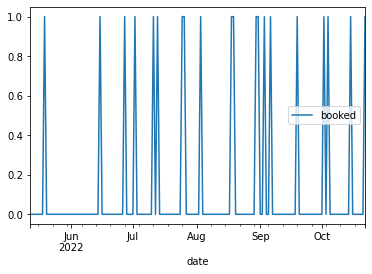

In [267]:
from datetime import datetime

# change index type to datetime 
#df.loc[(df.date < datetime(2022, 5, 11)) & (df.date > datetime(2021, 11, 1)), "booked"] = np.nan
df = df[(df.date > datetime(2022, 5, 11))]
df = df.set_index('date')
df.plot()

In [336]:
# to tensor
y = torch.tensor(df.booked.values, dtype=torch.float32)
test_size = 20
train_set = y[:-test_size]
test_set = y[-test_size:]
print(len(train_set), len(test_set))

144 20


In [337]:
def input_data(seq,ws):
    out = []
    L = len(seq)
    
    for i in range(L-ws):
        window = seq[i:i+ws]
        label = seq[i+ws:i+ws+1]
        out.append((window,label))
    
    return out

In [338]:
window_size = 20
train_data = input_data(train_set, window_size)
len(train_data)

124

In [339]:
train_data[0]

(tensor([0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0.]),
 tensor([0.]))

In [340]:
class LSTM(nn.Module):
    
    def __init__(self,input_size = 1, hidden_size = 50, out_size = 1):
        super().__init__()
        self.hidden_size = hidden_size
        self.lstm = nn.LSTM(input_size, hidden_size)
        self.linear = nn.Linear(hidden_size,out_size)
        self.hidden = (torch.zeros(1,1,hidden_size),torch.zeros(1,1,hidden_size))
    
    def forward(self,seq):
        lstm_out, self.hidden = self.lstm(seq.view(len(seq),1,-1), self.hidden)
        pred = self.linear(lstm_out.view(len(seq),-1))
        return pred[-1]

In [341]:
torch.manual_seed(42)
model = LSTM()
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.05, momentum=0.9)

Epoch 0 Loss: 1.215511441230774
Performance on test range: 0.17776674032211304


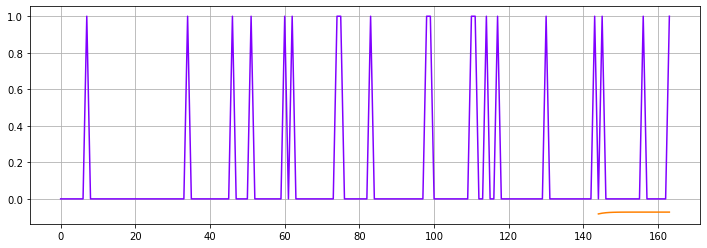

Epoch 1 Loss: 1.2159467935562134
Performance on test range: 0.17785504460334778


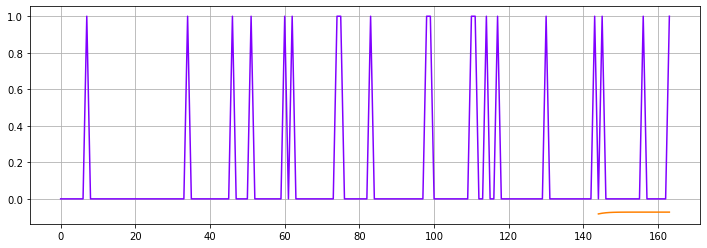

Epoch 2 Loss: 1.2166320085525513
Performance on test range: 0.17798782885074615


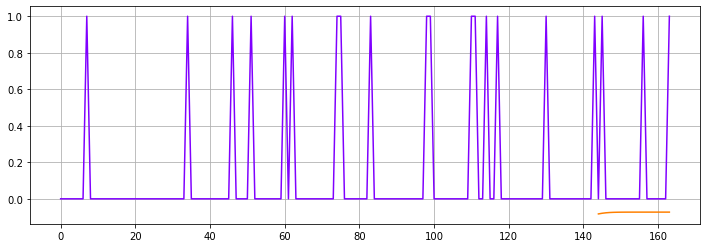

Epoch 3 Loss: 1.217604637145996
Performance on test range: 0.1781720072031021


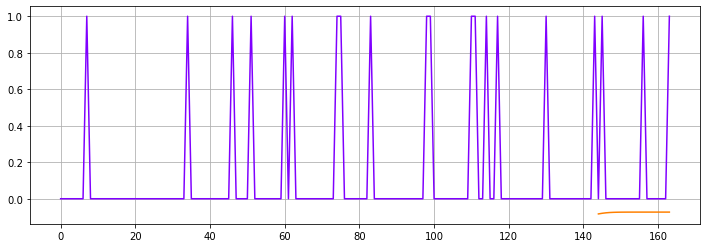

Epoch 4 Loss: 1.2189152240753174
Performance on test range: 0.17841669917106628


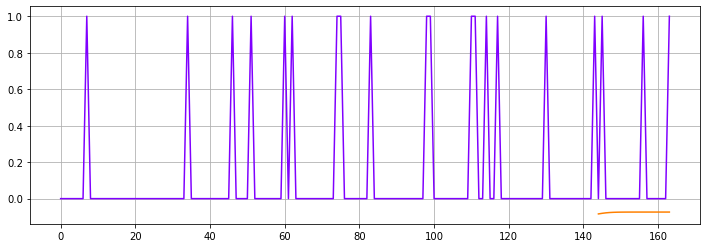

Epoch 5 Loss: 1.220635175704956
Performance on test range: 0.17873477935791016


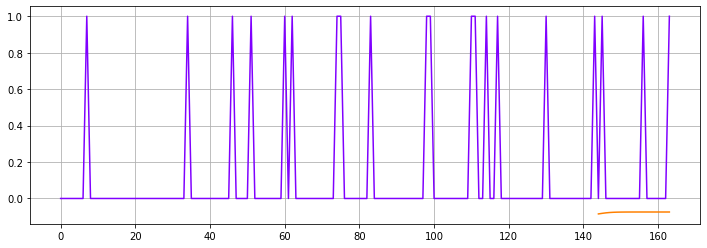

Epoch 6 Loss: 1.2228643894195557
Performance on test range: 0.17914409935474396


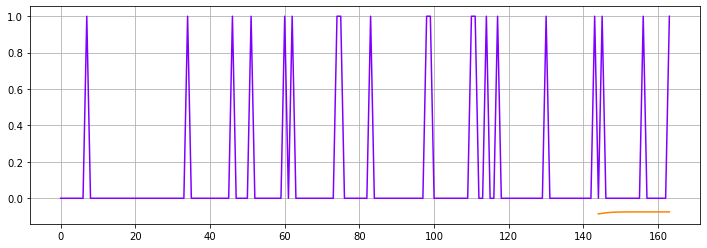

Epoch 7 Loss: 1.2257450819015503
Performance on test range: 0.17966987192630768


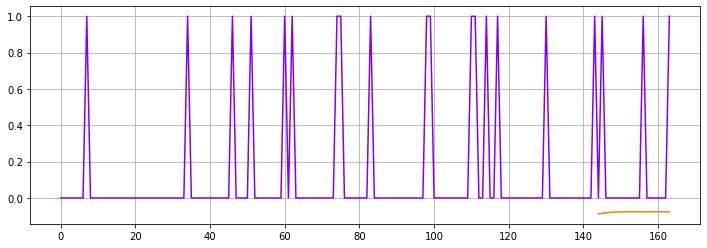

Epoch 8 Loss: 1.2294816970825195
Performance on test range: 0.18034818768501282


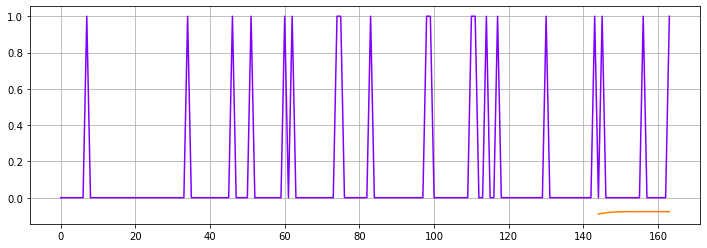

Epoch 9 Loss: 1.2343759536743164
Performance on test range: 0.18123197555541992


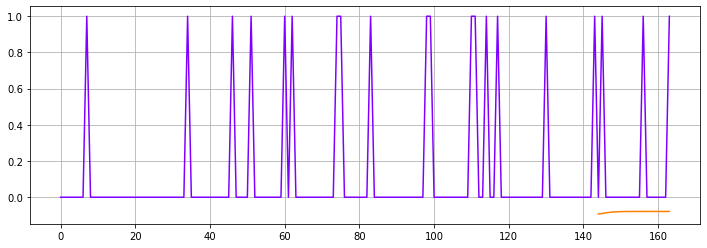

Epoch 10 Loss: 1.2408868074417114
Performance on test range: 0.18240107595920563


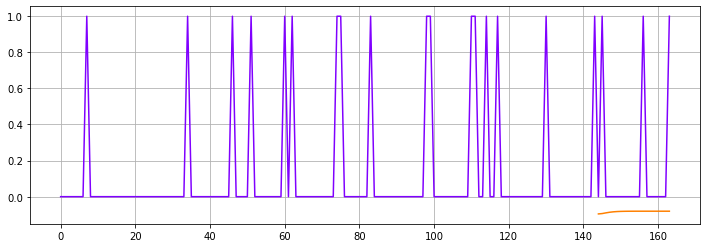

Epoch 11 Loss: 1.2497355937957764
Performance on test range: 0.18397995829582214


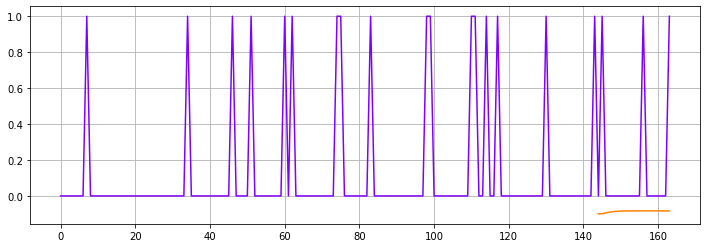

Epoch 12 Loss: 1.2621123790740967
Performance on test range: 0.18617138266563416


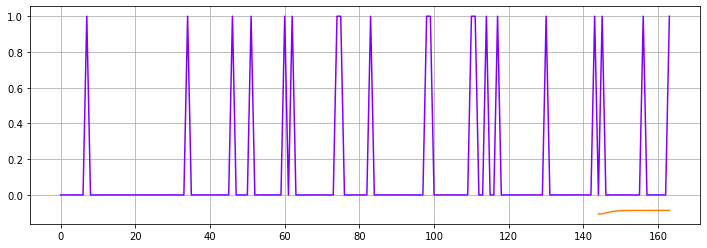

Epoch 13 Loss: 1.2800953388214111
Performance on test range: 0.18932268023490906


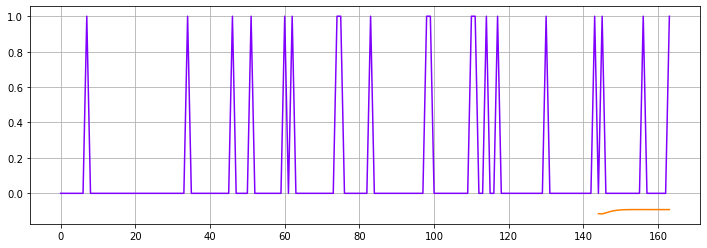

Epoch 14 Loss: 1.3076025247573853
Performance on test range: 0.19406622648239136


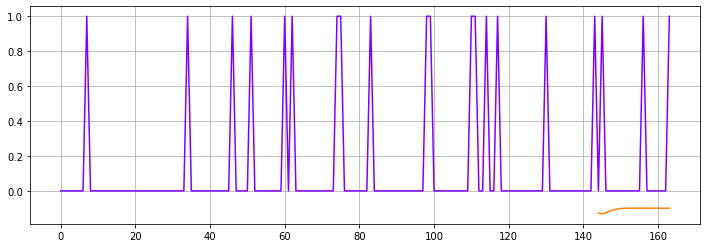

Epoch 15 Loss: 1.352890133857727
Performance on test range: 0.2016400843858719


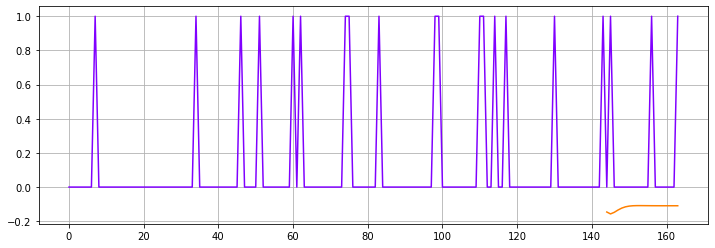

Epoch 16 Loss: 1.4370498657226562
Performance on test range: 0.21467240154743195


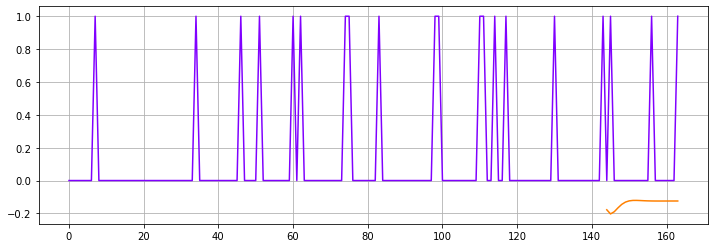

Epoch 17 Loss: 1.6441795825958252
Performance on test range: 0.23900803923606873


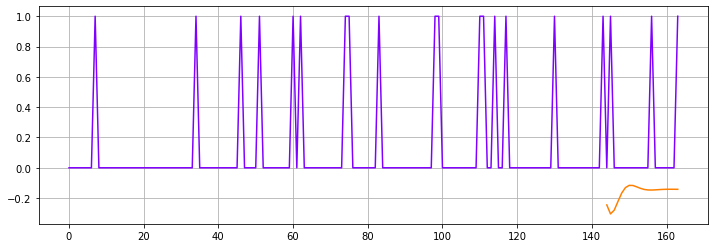

Epoch 18 Loss: 2.413055419921875
Performance on test range: 0.4675804674625397


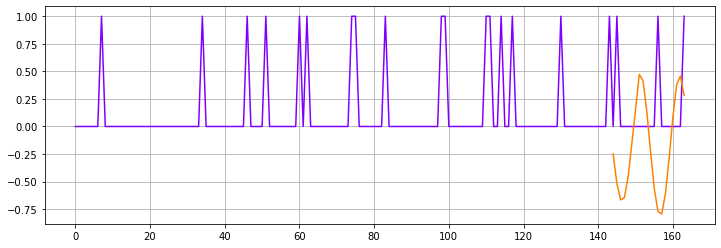

Epoch 19 Loss: 1.0603562593460083
Performance on test range: 0.15259580314159393


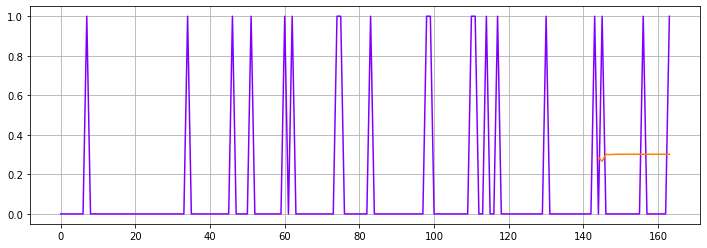

Epoch 20 Loss: 2.01387882232666
Performance on test range: 0.230402871966362


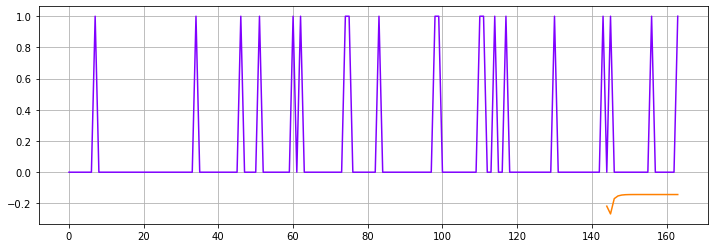

Epoch 21 Loss: 2.0542516708374023
Performance on test range: 0.2954009771347046


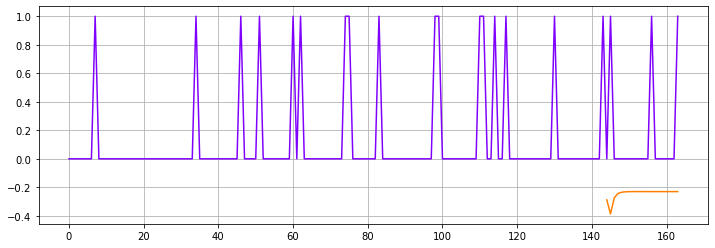

Epoch 22 Loss: 1.8875151872634888
Performance on test range: 0.29083436727523804


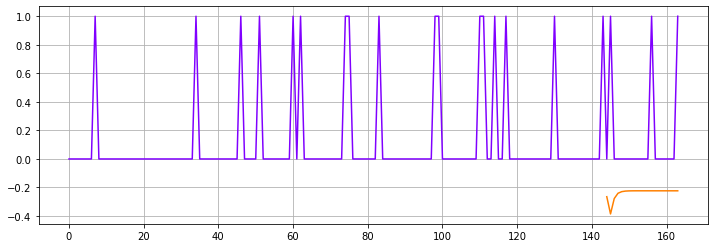

Epoch 23 Loss: 1.759782314300537
Performance on test range: 0.27669990062713623


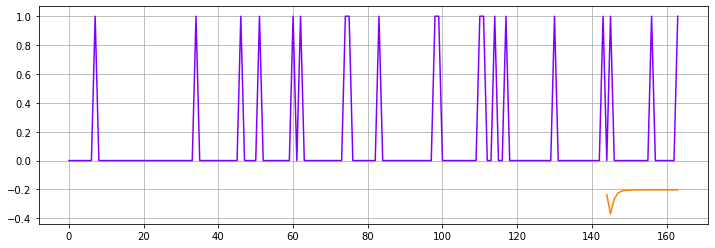

Epoch 24 Loss: 1.6788707971572876
Performance on test range: 0.26582223176956177


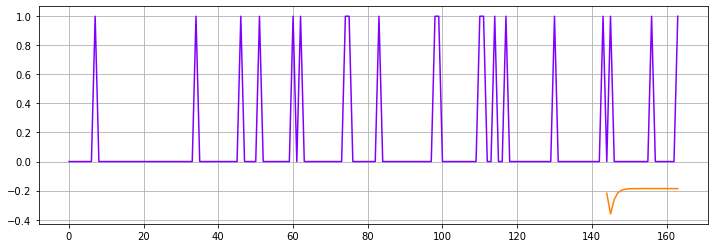

Epoch 25 Loss: 1.6360777616500854
Performance on test range: 0.2601836323738098


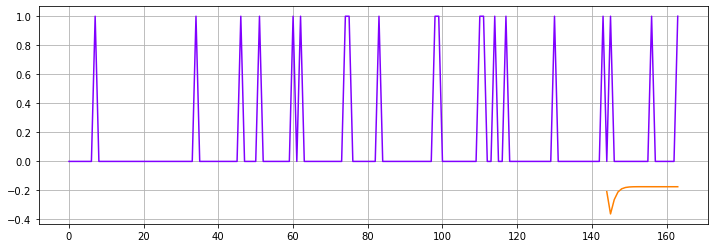

Epoch 26 Loss: 1.6275174617767334
Performance on test range: 0.26045724749565125


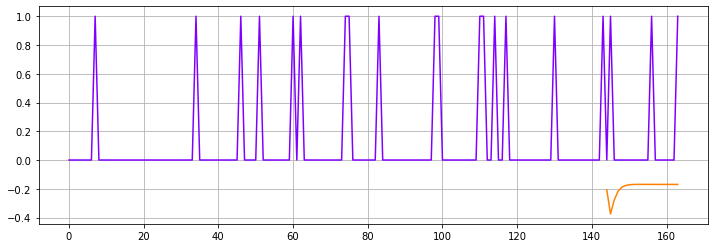

Epoch 27 Loss: 1.6535283327102661
Performance on test range: 0.2678348422050476


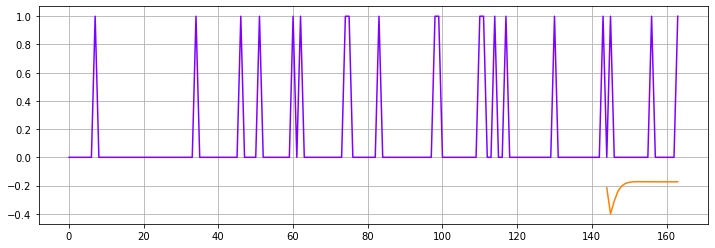

Epoch 28 Loss: 1.7140690088272095
Performance on test range: 0.28087130188941956


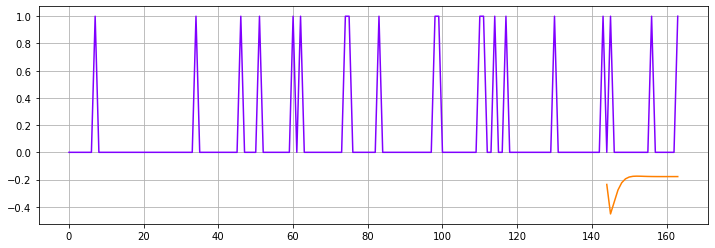

Epoch 29 Loss: 1.9219330549240112
Performance on test range: 0.2856013774871826


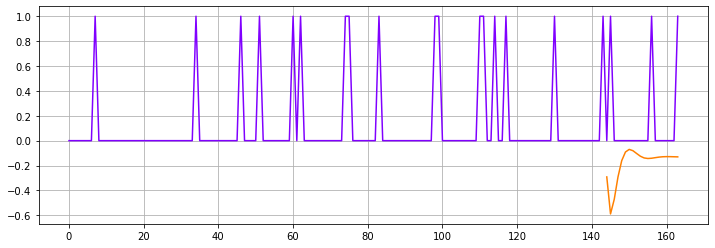

Epoch 30 Loss: 0.49575817584991455
Performance on test range: 0.16485124826431274


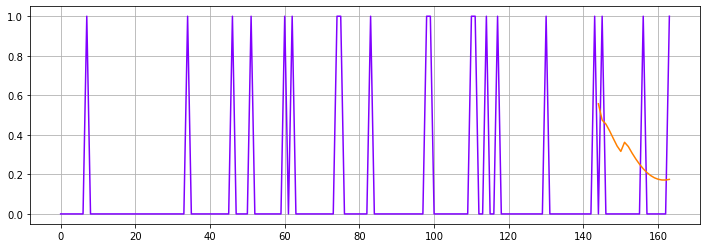

Epoch 31 Loss: 2.057506561279297
Performance on test range: 0.21347999572753906


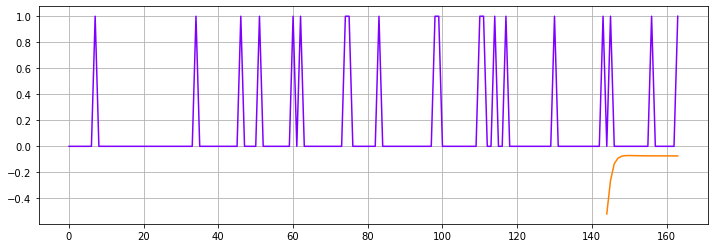

Epoch 32 Loss: 1.7668652534484863
Performance on test range: 0.2903912663459778


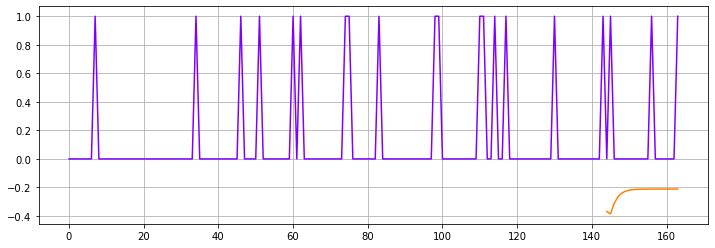

Epoch 33 Loss: 1.6987024545669556
Performance on test range: 0.2813528776168823


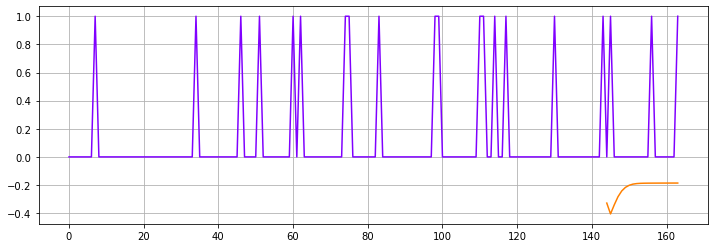

Epoch 34 Loss: 1.8376652002334595
Performance on test range: 0.3216680586338043


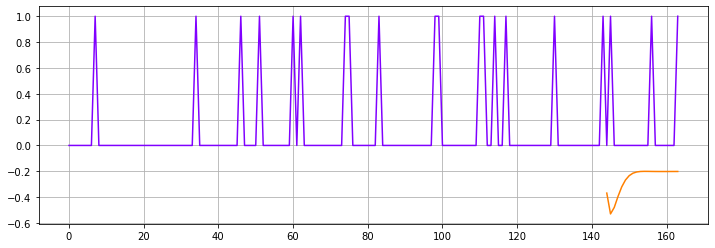

Epoch 35 Loss: 2.41296124458313
Performance on test range: 0.6460707187652588


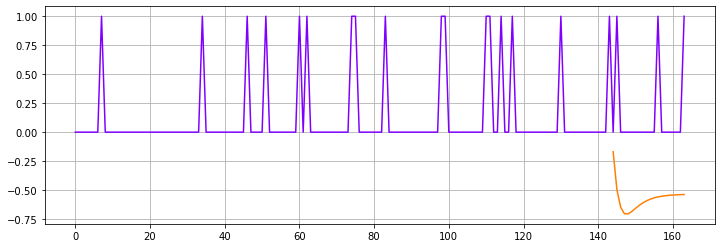

Epoch 36 Loss: 0.5455551743507385
Performance on test range: 0.35672110319137573


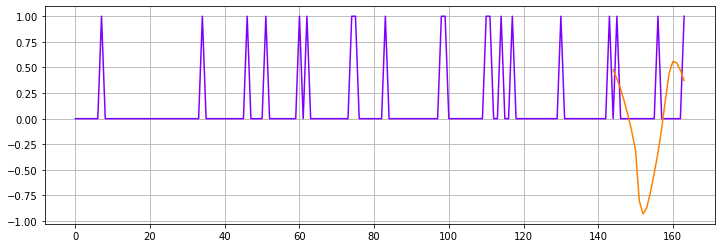

Epoch 37 Loss: 2.35611629486084
Performance on test range: 0.5594745874404907


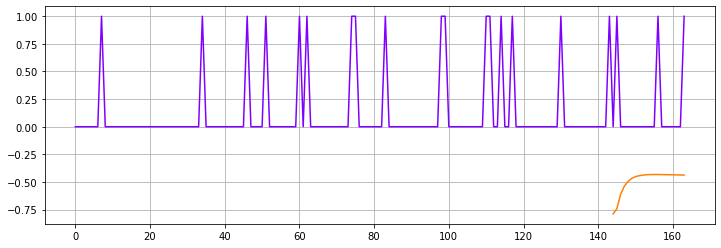

Epoch 38 Loss: 1.6762521266937256
Performance on test range: 0.47861868143081665


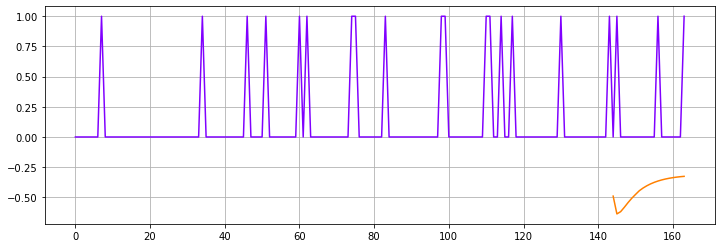

Epoch 39 Loss: 1.3440043926239014
Performance on test range: 1.0555297136306763


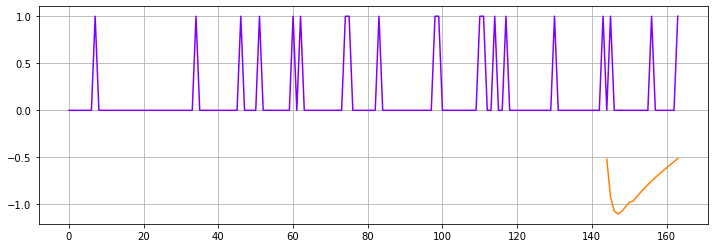

Epoch 40 Loss: 2.303044557571411
Performance on test range: 0.5396760702133179


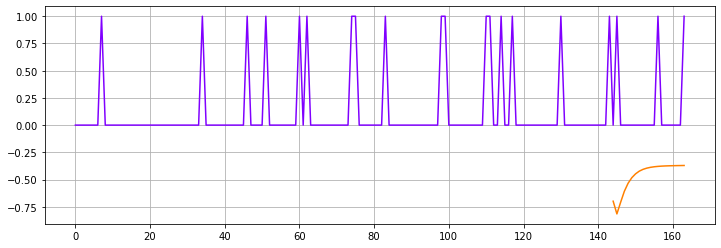

Epoch 41 Loss: 1.5511549711227417
Performance on test range: 0.45142245292663574


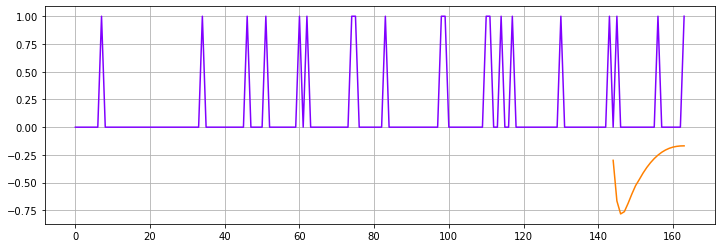

Epoch 42 Loss: 2.117161750793457
Performance on test range: 0.31236401200294495


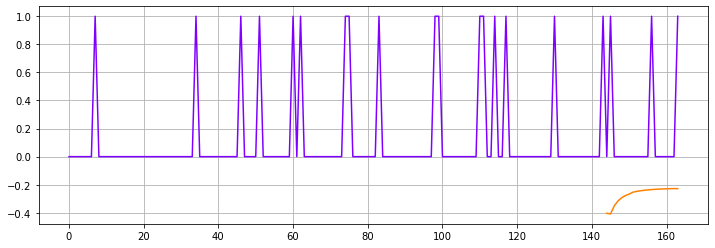

Epoch 43 Loss: 1.803102970123291
Performance on test range: 0.3566458523273468


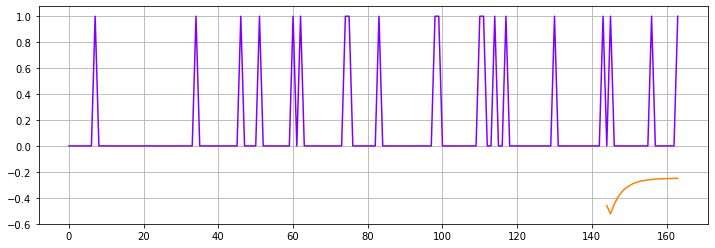

Epoch 44 Loss: 1.870461106300354
Performance on test range: 0.5056648254394531


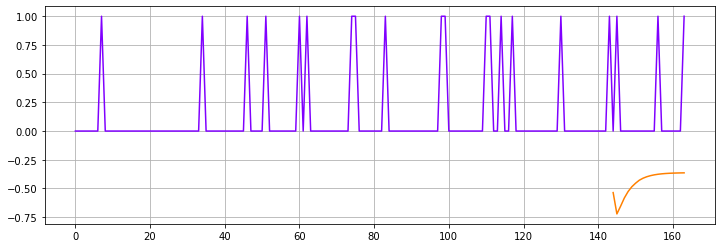

Epoch 45 Loss: 1.8725262880325317
Performance on test range: 0.5851955413818359


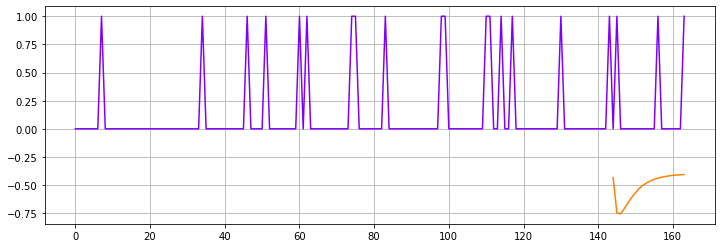

Epoch 46 Loss: 1.927021861076355
Performance on test range: 0.7546452879905701


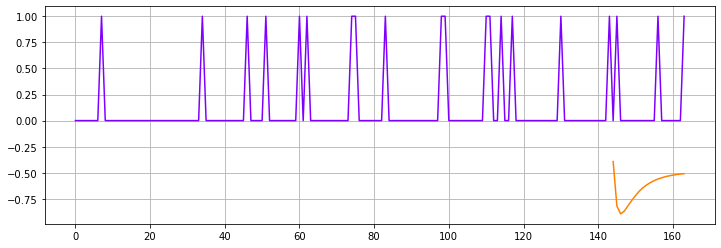

Epoch 47 Loss: 1.1213345527648926
Performance on test range: 0.6846925020217896


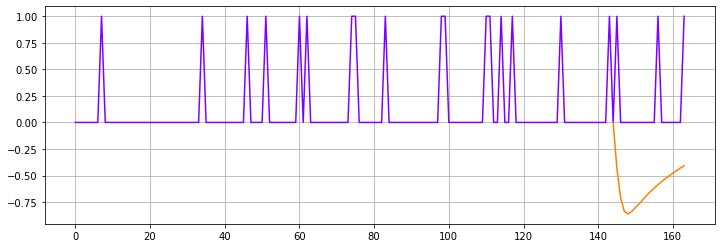

Epoch 48 Loss: 2.320634126663208
Performance on test range: 0.5085455179214478


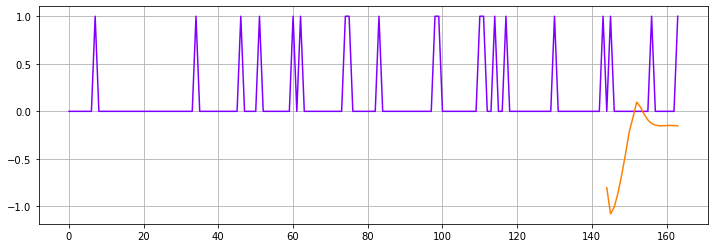

Epoch 49 Loss: 0.5161950588226318
Performance on test range: 0.1655830442905426


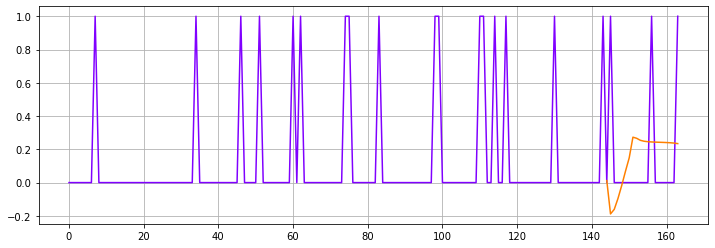

In [344]:
epochs = 50
future = 20

for i in range(epochs):
    
    for seq, y_train in train_data:
        optimizer.zero_grad()
        model.hidden = (torch.zeros(1,1,model.hidden_size),
                       torch.zeros(1,1,model.hidden_size))
        
        y_pred = model(seq)
        loss = criterion(y_pred, y_train)
        loss.backward()
        optimizer.step()
        
    print(f"Epoch {i} Loss: {loss.item()}")
    
    preds = train_set[-window_size:].tolist()
    for f in range(future):
        seq = torch.FloatTensor(preds[-window_size:])
        with torch.no_grad():
            model.hidden = (torch.zeros(1,1,model.hidden_size),
                           torch.zeros(1,1,model.hidden_size))
            preds.append(model(seq).item())
        
    loss = criterion(torch.tensor(preds[-window_size:]), y[144:])
    print(f"Performance on test range: {loss}")
    
    plt.figure(figsize=(12,4))
    plt.grid(True)
    plt.plot(y.numpy(),color='#8000ff')
    plt.plot(range(144,164),preds[window_size:],color='#ff8000')
    plt.show()

In [ ]:
df[df.booked.isna()]

,date,booked
